# **Employee Attrition Prediction**

In [53]:
# Import packages/modules for data processing
import pandas as pd
import numpy as np
from collections import defaultdict
import copy
np.random.seed(4)
import random
import re
import string

# import packages/modules for plotting/data viz
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('ggplot')
import seaborn as sns

# import packages/modules for modelling
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import log_loss, precision_recall_curve, average_precision_score, recall_score, precision_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix as plot_cm, roc_curve, auc, f1_score, precision_score, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold,RandomizedSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import itertools
from itertools import cycle
import scipy
from scipy import interp
from scipy.stats import loguniform, reciprocal, uniform

## **1. Data Pre-processing**

In [2]:
data = pd.read_csv('/Users/hudsonfinchbatista/Desktop/employee_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.iloc[:,10:-10].head()

,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating
0,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3
1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4
2,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3
3,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3
4,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3


In [4]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Qualitative-Qualitative Variable Analysis

In [7]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
data.groupby(['Department'])['Attrition'].value_counts().unstack()

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [9]:
dept = data.groupby(['Department'])['Attrition'].value_counts().unstack()
dept = dept.apply(lambda x: x*100/sum(x),axis=1)
dept

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


In [10]:
biz_travel = data.groupby(['BusinessTravel'])['Attrition'].value_counts().unstack()
biz_travel = biz_travel.apply(lambda x: x*100/sum(x),axis=1)
biz_travel

Attrition,No,Yes
BusinessTravel,,
Non-Travel,92.000000,8.000000
Travel_Frequently,75.090253,24.909747
Travel_Rarely,85.043145,14.956855


In [11]:
edu = data.groupby(['Education'])['Attrition'].value_counts().unstack()
edu = edu.apply(lambda x: x*100/sum(x),axis=1)
edu

Attrition,No,Yes
Education,,
1,81.764706,18.235294
2,84.397163,15.602837
3,82.692308,17.307692
4,85.427136,14.572864
5,89.583333,10.416667


In [12]:
edu_field = data.groupby(['EducationField'])['Attrition'].value_counts().unstack()
edu_field = edu_field.apply(lambda x: x*100/sum(x),axis=1)
edu_field

Attrition,No,Yes
EducationField,,
Human Resources,74.074074,25.925926
Life Sciences,85.313531,14.686469
Marketing,77.987421,22.012579
Medical,86.422414,13.577586
Other,86.585366,13.414634
Technical Degree,75.757576,24.242424


In [13]:
gender = data.groupby(['Gender'])['Attrition'].value_counts().unstack()
gender = gender.apply(lambda x: x*100/sum(x),axis=1)
gender

Attrition,No,Yes
Gender,,
Female,85.204082,14.795918
Male,82.993197,17.006803


In [14]:
marital = data.groupby(['MaritalStatus'])['Attrition'].value_counts().unstack()
marital = marital.apply(lambda x: x*100/sum(x),axis=1)
marital

Attrition,No,Yes
MaritalStatus,,
Divorced,89.908257,10.091743
Married,87.518574,12.481426
Single,74.468085,25.531915


In [15]:
relation = data.groupby(['RelationshipSatisfaction'])['Attrition'].value_counts().unstack()
relation = relation.apply(lambda x: x*100/sum(x),axis=1)
relation

Attrition,No,Yes
RelationshipSatisfaction,,
1,79.347826,20.652174
2,85.148515,14.851485
3,84.531590,15.468410
4,85.185185,14.814815


In [16]:
enviro = data.groupby(['EnvironmentSatisfaction'])['Attrition'].value_counts().unstack()
enviro = enviro.apply(lambda x: x*100/sum(x),axis=1)
enviro

Attrition,No,Yes
EnvironmentSatisfaction,,
1,74.647887,25.352113
2,85.017422,14.982578
3,86.313466,13.686534
4,86.547085,13.452915


In [17]:
job_invo = data.groupby(['JobInvolvement'])['Attrition'].value_counts().unstack()
job_invo = job_invo.apply(lambda x: x*100/sum(x),axis=1)
job_invo

Attrition,No,Yes
JobInvolvement,,
1,66.265060,33.734940
2,81.066667,18.933333
3,85.599078,14.400922
4,90.972222,9.027778


In [18]:
job_level = data.groupby(['JobLevel'])['Attrition'].value_counts().unstack()
job_level = job_level.apply(lambda x: x*100/sum(x),axis=1)
job_level

Attrition,No,Yes
JobLevel,,
1,73.664825,26.335175
2,90.262172,9.737828
3,85.321101,14.678899
4,95.283019,4.716981
5,92.753623,7.246377


In [19]:
job_satis = data.groupby(['JobSatisfaction'])['Attrition'].value_counts().unstack()
job_satis = job_satis.apply(lambda x: x*100/sum(x),axis=1)
job_satis

Attrition,No,Yes
JobSatisfaction,,
1,77.162630,22.837370
2,83.571429,16.428571
3,83.484163,16.515837
4,88.671024,11.328976


In [20]:
job_role = data.groupby(['JobRole'])['Attrition'].value_counts().unstack()
job_role = job_role.apply(lambda x: x*100/sum(x),axis=1)
job_role

Attrition,No,Yes
JobRole,,
Healthcare Representative,93.129771,6.870229
Human Resources,76.923077,23.076923
Laboratory Technician,76.061776,23.938224
Manager,95.098039,4.901961
Manufacturing Director,93.103448,6.896552
Research Director,97.500000,2.500000
Research Scientist,83.904110,16.095890
Sales Executive,82.515337,17.484663
Sales Representative,60.240964,39.759036


In [21]:
over_18 = data.groupby(['Over18'])['Attrition'].value_counts().unstack()
over_18 = over_18.apply(lambda x: x*100/sum(x),axis=1)
over_18

Attrition,No,Yes
Over18,,
Y,83.877551,16.122449


In [22]:
overtime = data.groupby(['OverTime'])['Attrition'].value_counts().unstack()
overtime = overtime.apply(lambda x: x*100/sum(x),axis=1)
overtime

Attrition,No,Yes
OverTime,,
No,89.563567,10.436433
Yes,69.471154,30.528846


In [23]:
perf_rating = data.groupby(['PerformanceRating'])['Attrition'].value_counts().unstack()
perf_rating = perf_rating.apply(lambda x: x*100/sum(x),axis=1)
perf_rating

Attrition,No,Yes
PerformanceRating,,
3,83.922830,16.077170
4,83.628319,16.371681


In [24]:
stock = data.groupby(['StockOptionLevel'])['Attrition'].value_counts().unstack()
stock = stock.apply(lambda x: x*100/sum(x),axis=1)
stock

Attrition,No,Yes
StockOptionLevel,,
0,75.594295,24.405705
1,90.604027,9.395973
2,92.405063,7.594937
3,82.352941,17.647059


In [25]:
work_life = data.groupby(['WorkLifeBalance'])['Attrition'].value_counts().unstack()
work_life = work_life.apply(lambda x: x*100/sum(x),axis=1)
work_life

Attrition,No,Yes
WorkLifeBalance,,
1,68.750000,31.250000
2,83.139535,16.860465
3,85.778275,14.221725
4,82.352941,17.647059


### Numerical and Quantiative Variable Analysis

In [26]:
data.groupby('Attrition')['Age'].mean()

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

In [27]:
num_qual = data.groupby('Attrition').agg({'Age':['mean'],
                             'DailyRate':['mean'],
                              'DistanceFromHome':['mean'],
                              'HourlyRate':['mean'],
                              'MonthlyIncome':['mean'],
                              'MonthlyRate':['mean'],
                              'NumCompaniesWorked':['mean'],
                              'PercentSalaryHike':['mean'],
                              'StandardHours':['mean'],
                              'EmployeeCount':['mean'],
                              'TotalWorkingYears':['mean'],
                              'TrainingTimesLastYear':['mean'],
                              'YearsAtCompany':['mean'],
                              'YearsInCurrentRole':['mean'],
                              'YearsSinceLastPromotion':['mean'],
                              'YearsWithCurrManager':['mean']})

num_qual.columns = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate',
                              'NumCompaniesWorked',
                              'PercentSalaryHike',
                              'StandardHours',
                              'EmployeeCount',
                              'TotalWorkingYears',
                              'TrainingTimesLastYear',
                              'YearsAtCompany',
                              'YearsInCurrentRole',
                              'YearsSinceLastPromotion',
                              'YearsWithCurrManager']

num_qual

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,EmployeeCount,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,65.952149,6832.739659,14265.779400,2.645580,15.231144,80,1,11.862936,2.832928,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,65.573840,4787.092827,14559.308017,2.940928,15.097046,80,1,8.244726,2.624473,5.130802,2.902954,1.945148,2.852321


In [28]:
len(num_qual.columns)

16

In [29]:
tables_list = [dept, biz_travel, edu, edu_field, gender, marital, relation, enviro, job_invo, 
               job_level, job_satis, job_role, overtime, perf_rating, stock, work_life]

In [30]:
len(tables_list)

16

## **2. Exploratory Data Analysis**

### Qualitative-Qualitative Visualizations

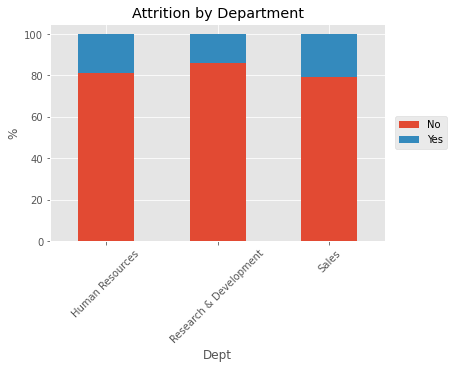

In [31]:
dept.plot(kind='bar',stacked=True,title='Attrition by Department')
plt.xlabel('Dept')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.show()

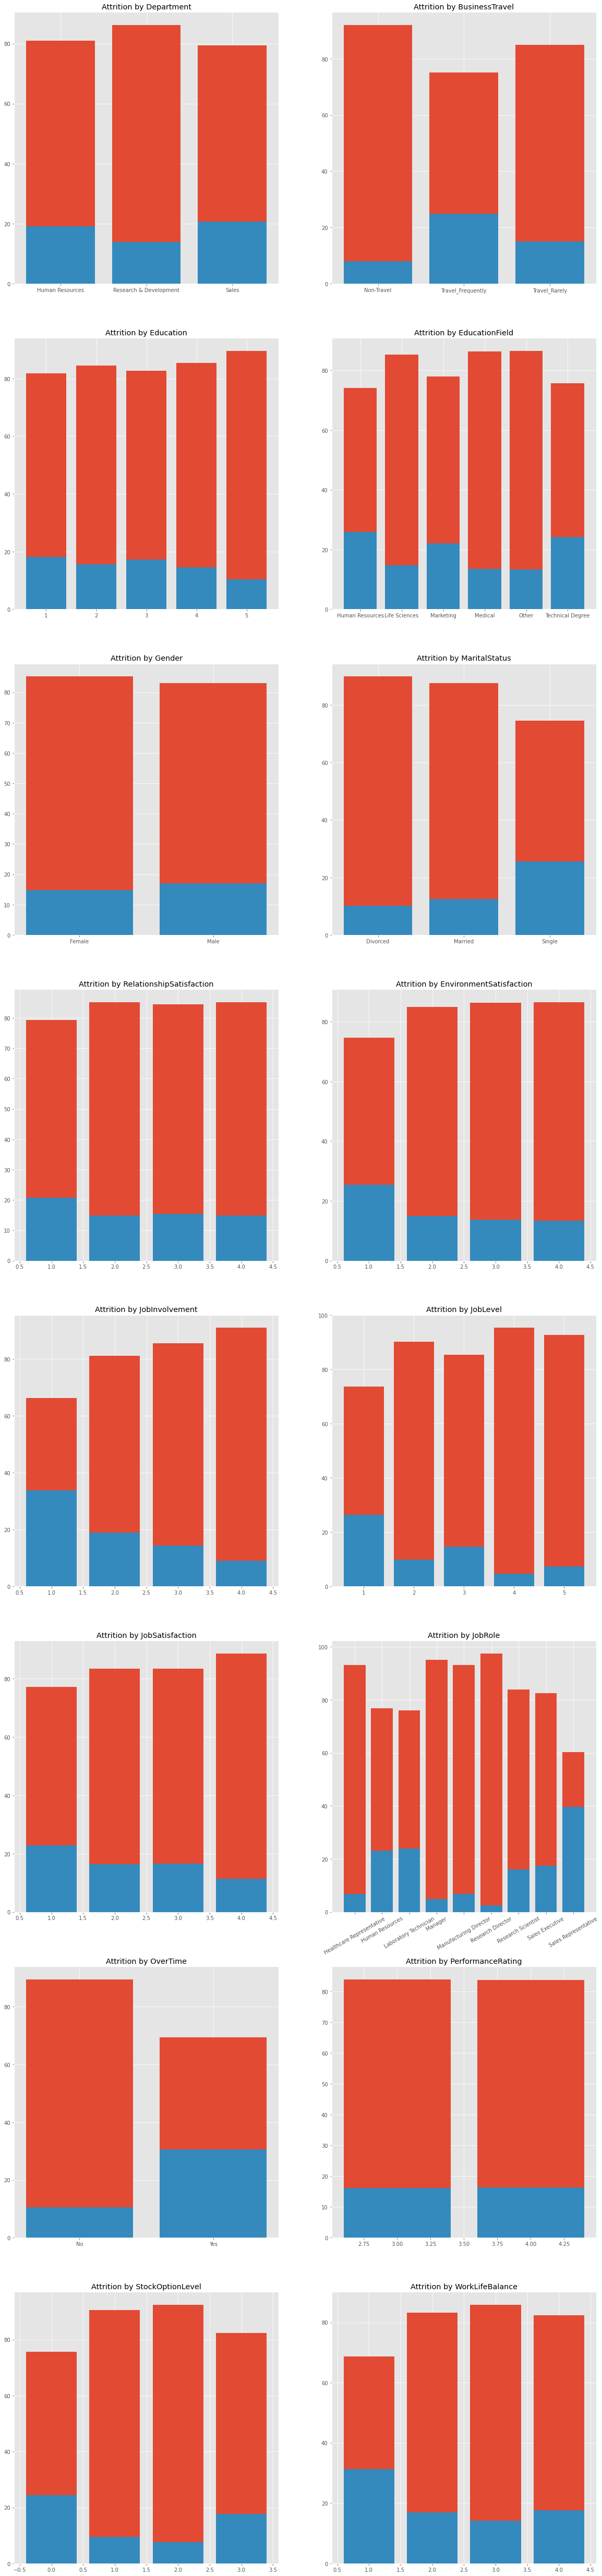

In [32]:
fig, ax = plt.subplots(nrows=8, ncols=2)
fig.set_size_inches(20, 90)

k = 0
for i in range(8):
    for j in range(2):
        data2 = tables_list[k]
        ax[i,j].bar(list(data2.index.values), list(data2.loc[:,'No']))
        ax[i,j].bar(list(data2.index.values), list(data2.loc[:,'Yes']))
        name = data2.index.name
        ax[i,j].set_title('Attrition by ' + name)
        if name == 'JobRole':
            ax[i,j].set_xticklabels(list(data2.index.values),rotation=30)
        k+=1

## Quantiative-Qualitative Visualizations

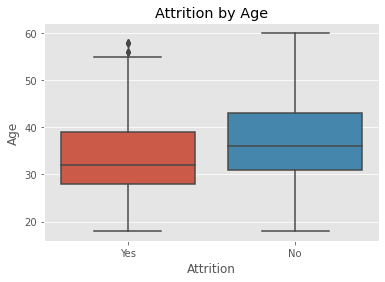

In [33]:
sns.boxplot(x=data['Attrition'], y=data['Age'])
plt.title('Attrition by Age')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

In [34]:
cols = list(num_qual.columns)
cols.append('Attrition')
data_num = data[data.columns[data.columns.isin(cols)]]
data_num.head()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,1,1,94,5993,19479,8,11,80,8,0,6,4,0,5
1,49,No,279,8,1,61,5130,24907,1,23,80,10,3,10,7,1,7
2,37,Yes,1373,2,1,92,2090,2396,6,15,80,7,3,0,0,0,0
3,33,No,1392,3,1,56,2909,23159,1,11,80,8,3,8,7,3,0
4,27,No,591,2,1,40,3468,16632,9,12,80,6,3,2,2,2,2


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

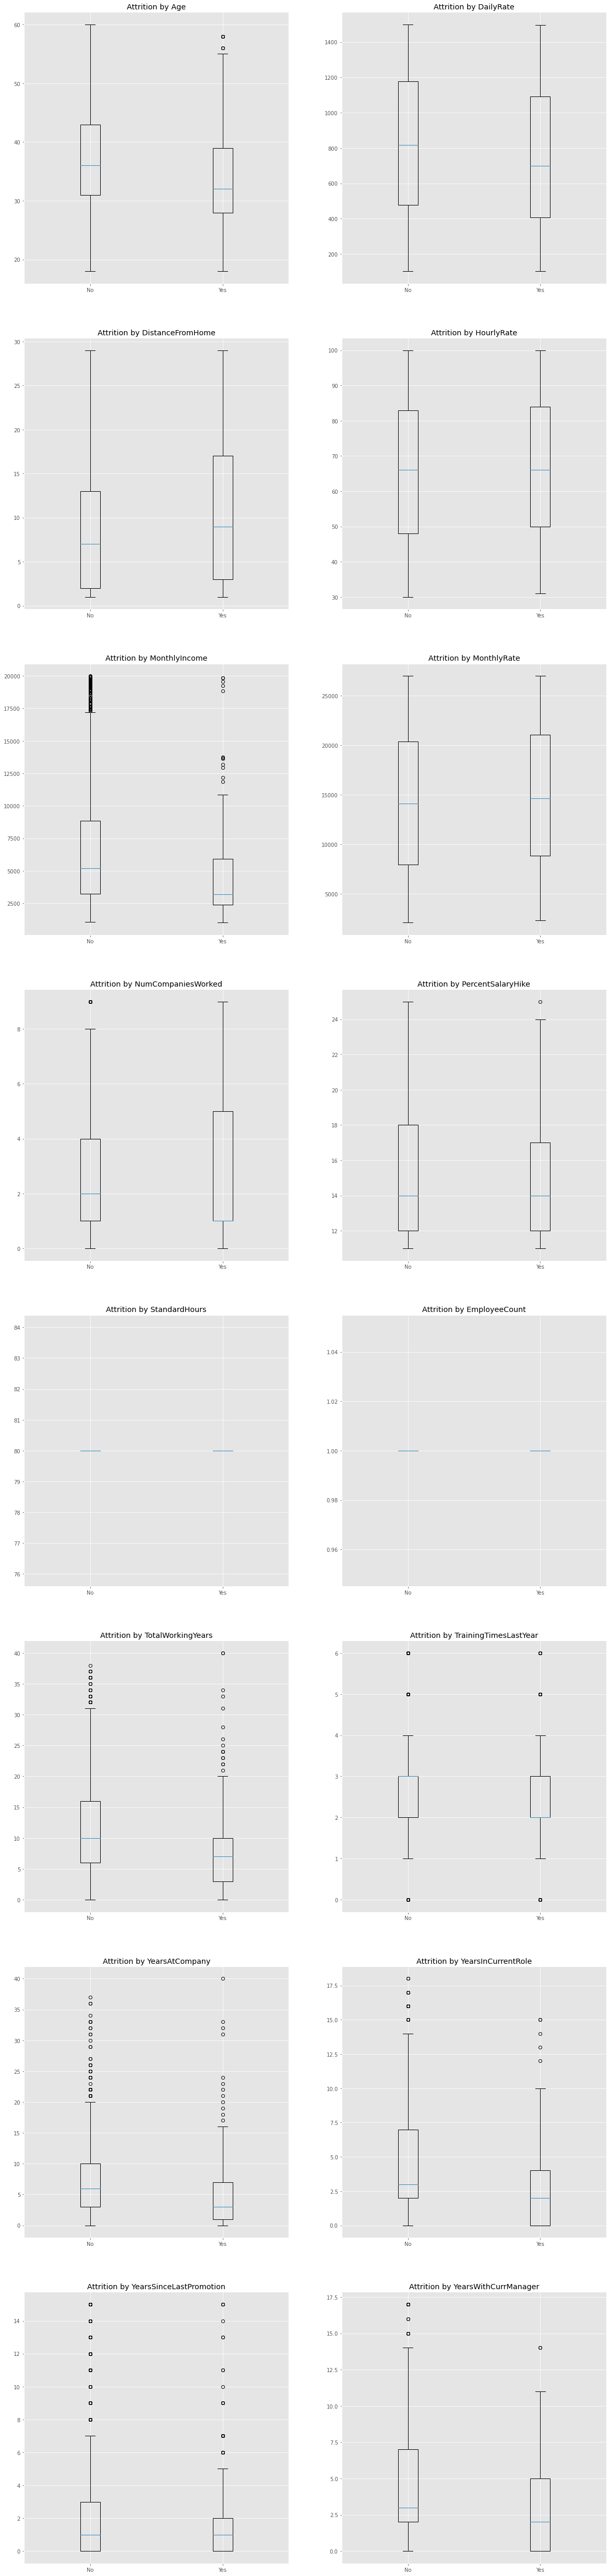

In [35]:
fig, ax = plt.subplots(nrows=8, ncols=2)
cols = list(num_qual.columns)
fig.set_size_inches(20, 90)

k = 0
for i in range(8):
    for j in range(2):
        data_num_no = data_num[data_num['Attrition'] == 'No']
        data_num_yes = data_num[data_num['Attrition'] == 'Yes']
        data_num_both = [list(data_num_no.loc[:,cols[k]]), list(data_num_yes.loc[:,cols[k]])]
        ax[i,j].boxplot(data_num_both)
        ax[i,j].set_title('Attrition by ' + cols[k])
        ax[i,j].set_xticklabels(['No', 'Yes'])
        k+=1
        

## **3. Data Preparation for Modeling**

In [36]:
data.drop(['StandardHours','EmployeeCount','Gender','Over18'],axis=1, inplace=True)
classes = sorted(list(data['Attrition'].value_counts().index.values))
classes

['No', 'Yes']

In [37]:
df = data.copy(deep=True)

In [38]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [39]:
le = preprocessing.LabelEncoder()

df['Attrition'] = le.fit_transform(df['Attrition'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [40]:
df = pd.get_dummies(df, prefix = ['Department','EducationField','MaritalStatus','JobRole',
                                     'BusinessTravel'], 
                      columns = ['Department','EducationField','MaritalStatus','JobRole',
                                'BusinessTravel'])

In [41]:
labels = df['Attrition']
df.drop('Attrition', axis=1, inplace=True)

len(df.columns)

49

In [42]:
train, test, train_labels, test_labels = train_test_split(df,labels,test_size=0.25,
                                                                              random_state=4)


## Class Balancing & Scaling

In [43]:
# Create Training and Testing Data Based on Optimal Scaling and Sampling Method Combination

smote = SMOTE(random_state=4)
majority = RandomUnderSampler('majority',random_state=4)
minority = SMOTE('minority',random_state=4)

min_max = MinMaxScaler()
standard = StandardScaler()

sampling_methods = [smote, majority, minority]
scaling_methods = [min_max, standard]

training_testing_dict = defaultdict(tuple)

i = 0
for scaling_method in scaling_methods:
    for sampling_method in sampling_methods:
        train_new = scaling_method.fit_transform(train)
        test_new = scaling_method.transform(test)
        train_new, train_labels_new = sampling_method.fit_resample(train_new, 
                                                                   train_labels)
        training_testing_dict[i] = train_new, test_new, train_labels_new, test_labels
        train_new = train_labels_new = test_new = None
        i+= 1

/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:635: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:635: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [44]:
# Function to Find Optimal Training Data

def optimize_data(train_test_data, model):
    
    i = 0
    index = None
    best_recall = 0
    
    for train, test, train_labels, test_labels in train_test_data.values():
        model.fit(train, train_labels)
        preds = model.predict(test)
        recall = recall_score(test_labels, preds, average='binary')

        if recall > best_recall:
            best_recall = recall
            index = i
        i += 1
            
    return train_test_data[index]

In [45]:
# Using Arbitrary Random Forest Model to Find Optimal Class Balanced Training Data

arbitrary_model = RandomForestClassifier(random_state=4)

train, test, train_labels, test_labels = optimize_data(training_testing_dict, 
                                                       arbitrary_model)


## **4. Machine Learning Modeling**

In [46]:
# model for optimizing hyperparameters

def optimize_params(train, train_labels, rs):
    
    rs.fit(train, train_labels)
    model = rs.best_estimator_
    
    return model

## Hyperparameter Optimization

In [47]:
# Baseline Model

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(train, train_labels)

DummyClassifier(strategy='most_frequent')

In [48]:
# 1. Random Forest Model

param_grid = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': list(np.linspace(3,30).astype(int)),
    'max_features': ['auto','sqrt'] + list(np.arange(0.3,1,0.1)),
    'max_leaf_nodes': list(np.linspace(10,50,500).astype(int)),
    'min_samples_split': [2,5,10,15,20],
    'bootstrap': [True,False]
}

rf_estimator = RandomForestClassifier(random_state=4)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=4)

rf = RandomizedSearchCV(rf_estimator, param_grid, n_jobs=-1, cv=cv, 
                        n_iter=10, verbose = 3, scoring='roc_auc')

best_rf = optimize_params(train, train_labels, rf)


Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   31.0s finished


In [49]:
# 2. Logistic Regression Model

# Create Instance of Model
logreg = LogisticRegression(random_state = 4)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=4)

rs_logreg = RandomizedSearchCV(logreg, space, n_iter=10, scoring='recall', 
                            n_jobs=-1, cv=cv, random_state=4)

best_log = optimize_params(train, train_labels, rs_logreg)

In [50]:
# 3. Extreme Gradient Boosted Machine Model

xgb = XGBClassifier(random_state=4)

param_grid2 = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree' : [0.3, 0.5, 0.7],
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=4)

rs_xgb = RandomizedSearchCV(xgb, param_grid2, cv=cv, n_iter=10, random_state=4, 
                            scoring='roc_auc', n_jobs=-1)

best_xgb = optimize_params(train, train_labels, rs_xgb)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
# 4. Light Gradient Boosted Machine Model

lgbm = LGBMClassifier(random_state=4)

param_grid3 = {'n_estimators': np.linspace(0,200).astype(int),
              'max_depth': [None] + list(np.linspace(3,20).astype(int)),
              'learning_rate': [0.01, 0.1, 0.2],
               'colsample_bytree' : [0.5, 0.7, 0.9],
               'subsample':[0.5, 0.7, 0.9],
               'num_leaves': np.arange(20,3000,20)
              }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=4)

rs_lgbm = RandomizedSearchCV(lgbm, param_grid3, cv=cv, n_iter=10,random_state=4, 
                             scoring='neg_log_loss', n_jobs=-1)
            
best_lgbm = optimize_params(train, train_labels, rs_lgbm)

In [54]:
# # 5. Support Vector Machine

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale", probability=True)

param_grid4 = {'C': [0.1, 1, 10],
               'gamma': [0.0001, 0.001, 0.01],
              'kernel':['linear','rbf']}

rs_svm = RandomizedSearchCV(svc, param_grid4, cv=KFold(3, random_state=4, shuffle=True),
                            n_iter=10, random_state=4, 
                            n_jobs=-1, scoring='neg_log_loss')

best_svm = optimize_params(train, train_labels, rs_svm)


## Model Evaluation & Metrics

In [55]:
# Create Predictions and Evaluate Models on Test Data

model_types = ['Dummy','Random Forest', 'Logistic Regression', 'Extreme Gradient Boosted Machine',
              'Light Gradient Boosted Machine', 'Support Vector Machine']

models = [dummy, best_rf, best_log, best_xgb, best_lgbm, best_svm]
model_metrics = defaultdict(list)

for model, model_type in zip(models, model_types):
    preds = model.predict(test)
    probs = model.predict_proba(test)
    acc = accuracy_score(test_labels, preds)
    recall = recall_score(test_labels, preds, average='binary')
    prec = precision_score(test_labels, preds, average='binary')
    f1 = f1_score(test_labels, preds)
    auc = roc_auc_score(test_labels, probs[:,1])
    loss = log_loss(test_labels, probs)
    metrics = [acc, prec, recall, f1, auc, loss]
    model_metrics[model_type] = metrics

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
model_metrics_df = pd.DataFrame(model_metrics)
model_metrics_df.index = ['Accuracy', 'Precision', 'Recall', 'F1 Score',
                         'ROC AUC', 'Log Loss']
model_metrics_df

,Dummy,Random Forest,Logistic Regression,Extreme Gradient Boosted Machine,Light Gradient Boosted Machine,Support Vector Machine
Accuracy,0.836957,0.752717,0.771739,0.733696,0.752717,0.785326
Precision,0.000000,0.355140,0.392857,0.333333,0.362832,0.407767
Recall,0.000000,0.633333,0.733333,0.633333,0.683333,0.700000
F1 Score,0.000000,0.455090,0.511628,0.436782,0.473988,0.515337
ROC AUC,0.500000,0.747727,0.810335,0.761959,0.751299,0.809686
Log Loss,5.631322,0.564479,0.495106,0.567512,0.554681,0.487574


## Visualization of Model Performance

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

In [58]:
def getImportances(feature_importances):
    top_importances = []
    top_features_list = []

    for x,y in feature_importances:
        if(y > 0.025):
            top_features_list.append(x)
            top_importances.append(y)
    return top_features_list, top_importances

In [60]:
def plotImportances(top_importances, top_features_list, model_type, color):
    x_values = list(range(len(top_importances)))
    plt.bar(x_values, top_importances, orientation= 'vertical', color=color)
    plt.xticks(x_values, top_features_list, rotation = 'vertical')
    plt.ylabel('Importance')
    plt.xlabel('Variable')
    plt.title('Top Variable Importances: {0}'.format(model_type))
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

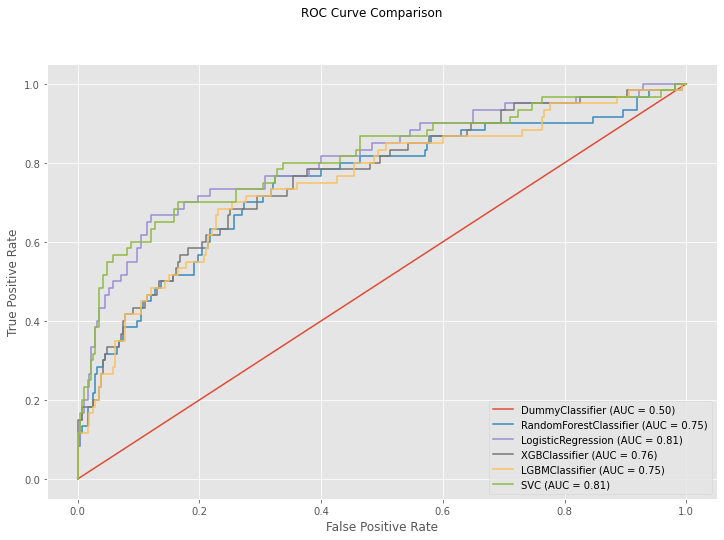

In [61]:
# ROC AUC

i = 0

for model, model_type in zip(models, model_types):
    if i == 0:
        disp = plot_roc_curve(model, test, test_labels)
        axis = disp.ax_
    else:
        new_disp = plot_roc_curve(model, test, test_labels, ax=axis)
    i+=1
    
new_disp.figure_.suptitle("ROC Curve Comparison")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

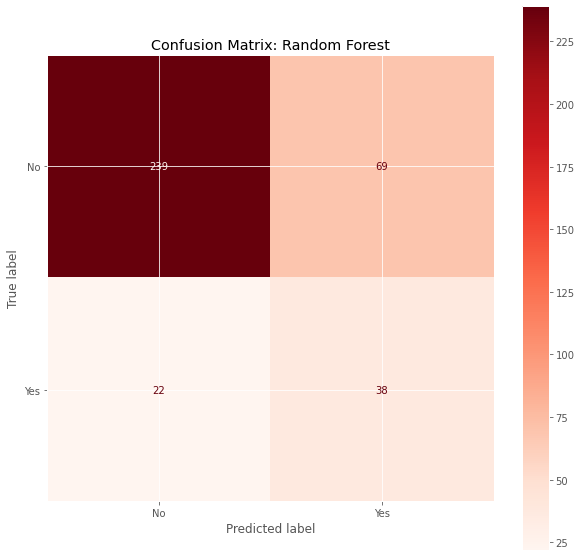

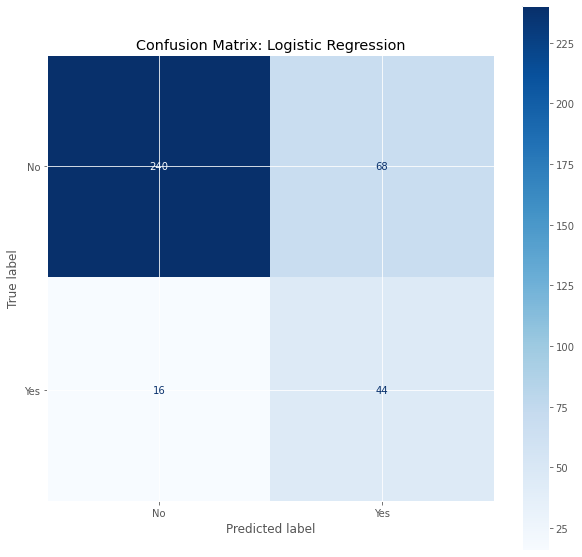

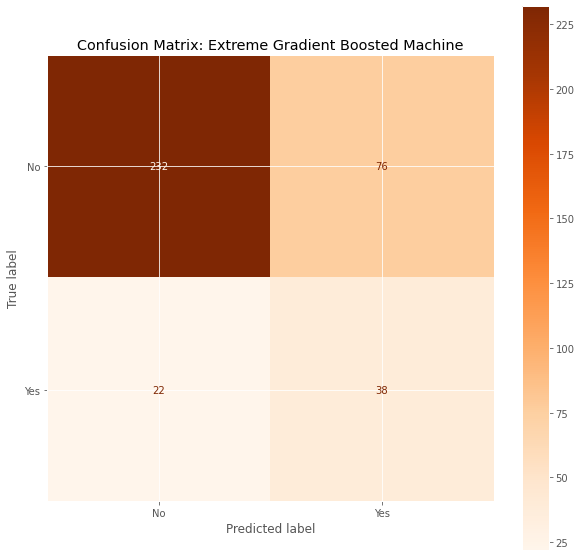

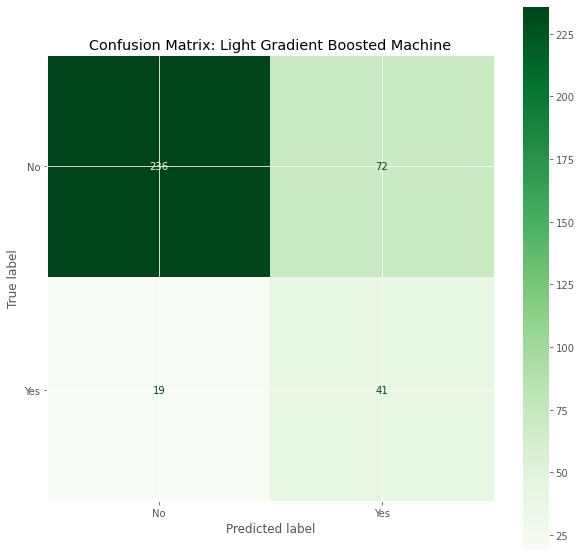

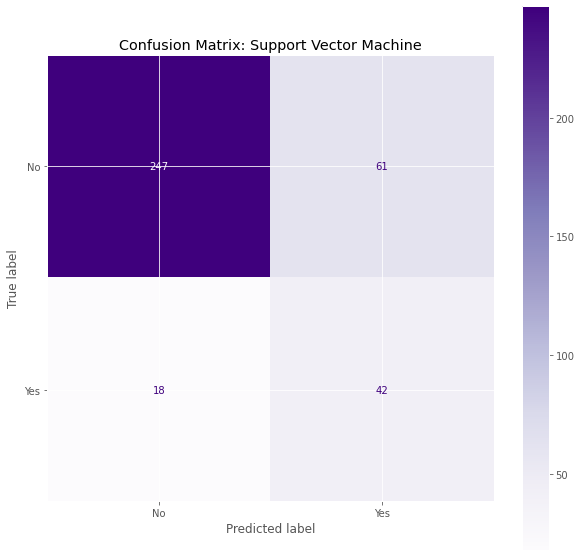

In [62]:
# Confusion Matrices
models.pop(0)
model_types.pop(0)

cmaps = [plt.cm.Reds, plt.cm.Blues, plt.cm.Oranges, plt.cm.Greens, plt.cm.Purples]

for model, model_type, cmap in zip(models, model_types, cmaps):
    plot_cm(model, test, test_labels, display_labels=classes, 
            cmap=cmap)
    plt.title(f'Confusion Matrix: {model_type}')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.show()

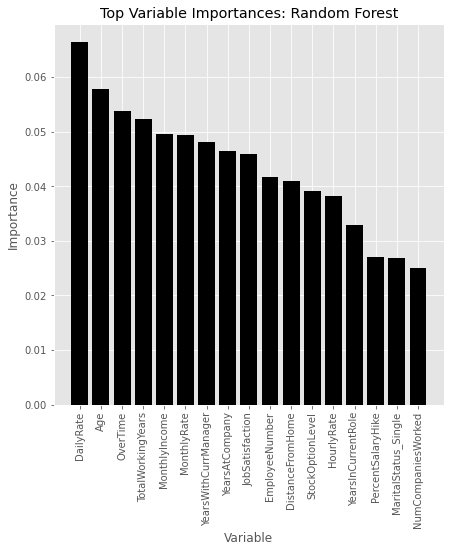

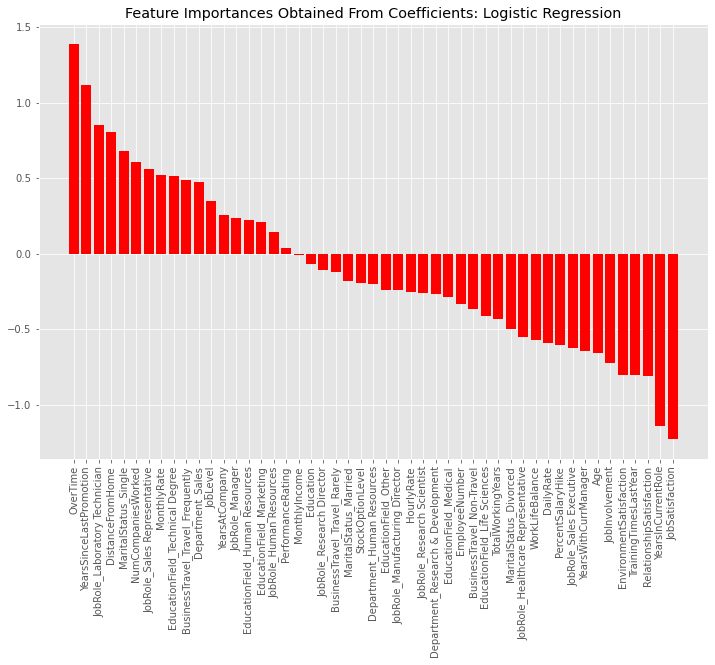

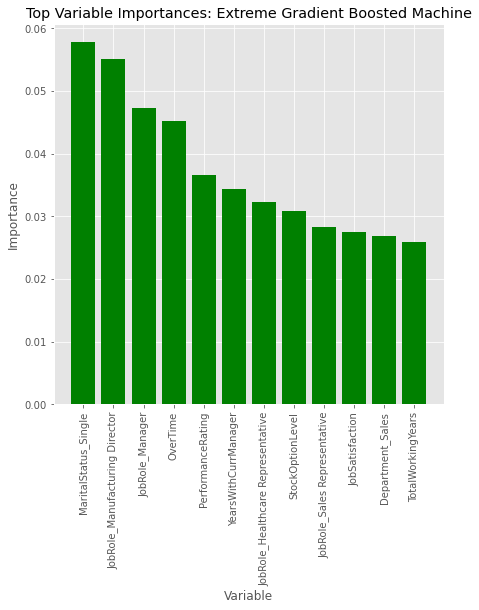

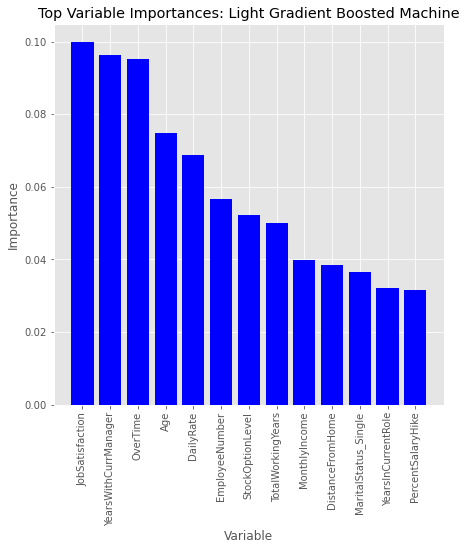

In [63]:
# Feature Importances

xgb_rf = ['Random Forest', 'Extreme Gradient Boosted Machine']
colors=['black', 'red', 'green', 'blue', 'cyan']

for model, model_type, color in zip(models, model_types, colors):
    if model_type == 'Light Gradient Boosted Machine':
        lgbm_importances = model.booster_.feature_importance(importance_type='gain')/sum(model.booster_.feature_importance(importance_type='gain'))
        importances = list(lgbm_importances)
        feature_list = list(df.columns)
        feature_importances = [(feature, importance) for feature, importance in 
                               zip(feature_list,importances)]
        feature_importances_ = sorted(feature_importances, key = lambda x: x[1], reverse=True)
        top_features_list, top_importances = getImportances(feature_importances_)
        plotImportances(top_importances, top_features_list, model_type, color)

    elif model_type in xgb_rf:
        importances = list(model.feature_importances_)
        feature_list = list(df.columns)
        feature_importances = [(feature, importance) for feature, importance in 
                               zip(feature_list,importances)]
        feature_importances_ = sorted(feature_importances, key = lambda x: x[1], reverse=True)
        top_features_list, top_importances = getImportances(feature_importances_)
        plotImportances(top_importances, top_features_list, model_type, color)
        
    elif model_type == 'Logistic Regression':
        importances = pd.DataFrame(data={'Attribute': df.columns,
                                         'Importance': model.coef_[0]})
        importances = importances.sort_values(by='Importance', ascending=False)
        plt.bar(x=importances['Attribute'], height=importances['Importance'], color=color)
        plt.title('Feature Importances Obtained From Coefficients: Logistic Regression')
        fig=plt.gcf()
        fig.set_size_inches(12,8)
        plt.xticks(rotation='vertical')
        plt.show()
    
    else:
        continue
        
        

## **Conclusion**



##### The most important variable across each model was the overtime variable. Basically, employees that worked overtime were more likely to leave the company compared to employees that did not work overtime. There was a lot of variation in the importance of features across the different models, however, job satisfaction, work life balance, age, daily rate, and marital status appeared to be common predictors of attrition.

##### Each model was unique in its classificatory power. Since the ultimate goal was to predict employee attrition, recall was the metric that was optimized across all models. Though the precision could've been used as well, I decided that it was more critical to reduce the proportion of false negatives (i.e. employees that left who were classified as staying) than to reduce the proportion of false positives (i.e. employees who stayed who were classified as leaving). The best models in this regard were the support vector machine and the logistic regression model. 